<a href="https://colab.research.google.com/github/cdkontos/MSC-DWS-Machine-Learning-Course-Exercises/blob/main/Exercise_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from statistics import mean, stdev

# Logistic Regression

## Question 1

### Load Dataset

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Describe Dataset

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Histograms

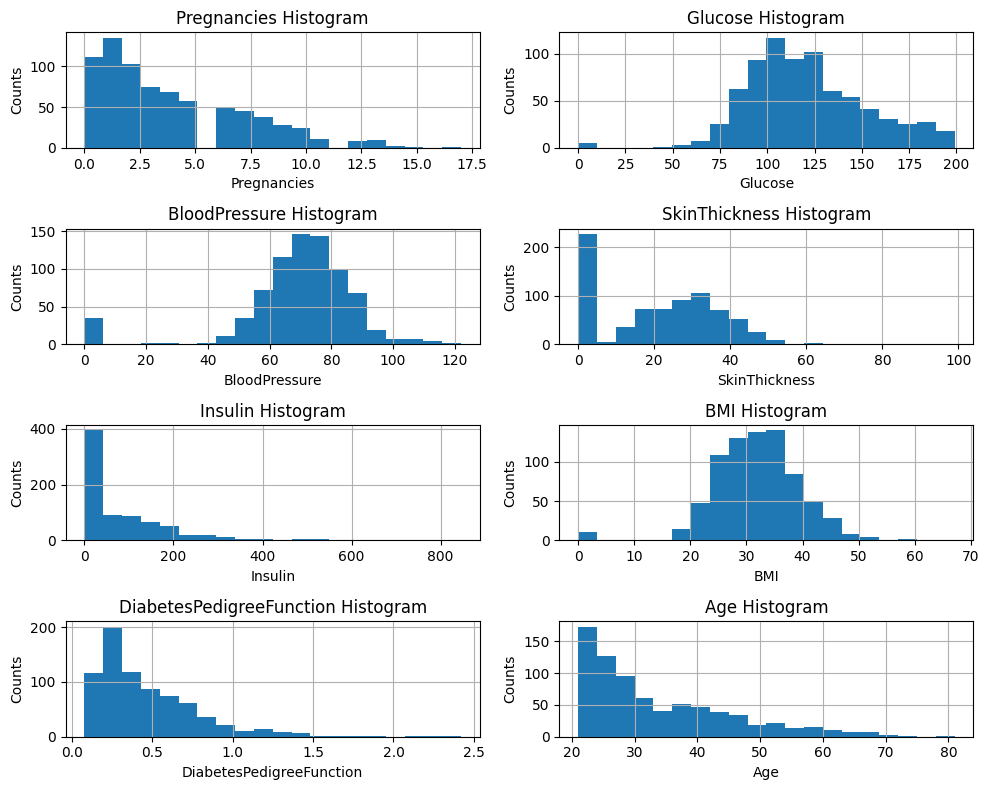

In [ ]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
figure, axes = plt.subplots(4, 2, figsize=(10,8))

axes = axes.flatten()
for i, col in enumerate(columns):
    df[col].hist(bins=20, ax=axes[i])
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Counts')

plt.tight_layout()
plt.show()

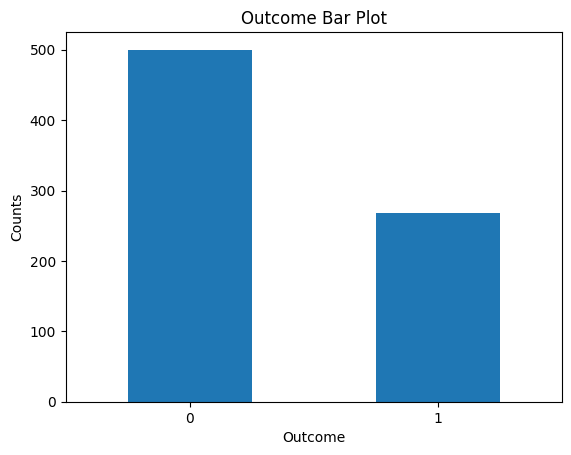

In [ ]:
df['Outcome'].value_counts().plot.bar(rot = 0)
plt.title('Outcome Bar Plot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

## Question 2

I believe the quality of the data is poor for the following two reasons:


1.   In various columns such as Glucose, BloodPressure and BMI zero values are contained, which would be impossible in reality. This could be due to missing values or wrong inputs.
2.   Some values, while not zero, are unrealistic such as an extremely high amount of pregnancies, which could affect model training adversely.



## Question 3

The Age variable follows an exponential distribution, which means that the majority of the data is concentrated around the younger ages, that is in a range of around 20 to 45. As such, while a sufficient amount of examples are provided for the younger population, with the decreased amount of data for elders, the model that will be created from this data will be unreliable for those older ages.

## Question 4

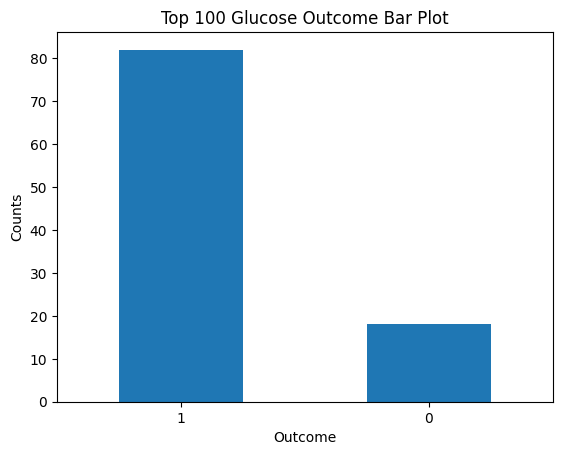

In [ ]:
top100Glucose = df.sort_values(by="Glucose", ascending=False).head(100)
top100Glucose['Outcome'].value_counts().plot.bar(rot = 0)
plt.title('Top 100 Glucose Outcome Bar Plot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

By examining the top 100 Glucose patients in the dataset we can see that the vast majority of them were diagnosed with diabetes, thus proving a strong connection between the two variables.

## Question 5

### Convert DataFrame to Numpy arrays

In [ ]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

### Split Dataset to Train-Test

In [ ]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

## Question 6

### Create and train Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=seed)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Evaluate Model on test set

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model on the test set is: {accuracy_percentage}')

The accuracy of the model on the test set is: 77.92


### Evaluate Model on training set

In [ ]:
y_pred = model.predict(x_train)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')

The accuracy of the model on the train set is: 76.54


## Question 7

/tmp/ipython-input-165730382.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_per_group = validation_df.groupby('Age Group').apply(
/tmp/ipython-input-165730382.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_group = validation_df.groupby('Age Group').apply(


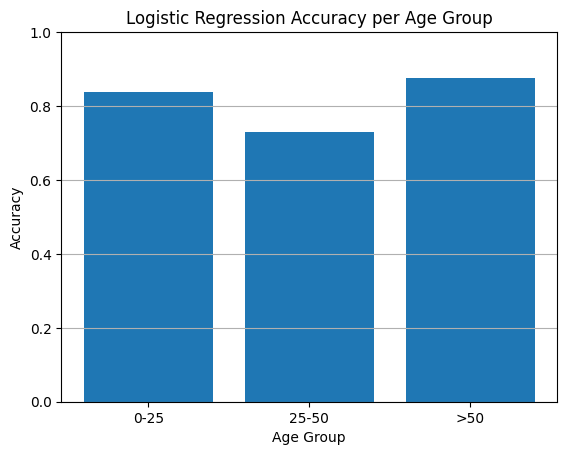

In [ ]:
validation_df = pd.DataFrame(x_test, columns=input_df.columns)
validation_df['Outcome'] = y_test
validation_df['Predicted'] = y_pred

bins = [0, 25, 50, np.inf]
labels = ['0-25', '25-50', '>50']
validation_df['Age Group'] = pd.cut(validation_df['Age'], bins=bins, labels=labels, right=False)

accuracy_per_group = validation_df.groupby('Age Group').apply(
    lambda group: accuracy_score(group['Outcome'], group["Predicted"])
)

plt.bar(accuracy_per_group.index, accuracy_per_group.values)
plt.title('Logistic Regression Accuracy per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation = 0)
plt.grid(axis='y')
plt.show()

The classifier performs better for the age groups 0-25 and >50 than 25-50. This could indicate that in younger and older ages, clinical data and characteristics are clearer and help the diagnosis process. Moreover the classifier might have reduced accuracy due to lack of data in that age range or noise.

## Question 8


I believe it is worse for the classifier to predict that a patient does not have diabetes when they do have it that is a false negative, as it is better to take precautions even if there is no need rather than let a patient suffer from the illness. False negatives in medical situations are extremely dangerous as they can cause to a variety of problems in the future depending on the illness that was left untreated.

## Question 9

In [ ]:
train_accuracies = []
test_accuracies = []

for seed in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
  x_train.shape, y_train.shape, x_test.shape, y_test.shape
  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  test_accuracies.append(accuracy)
  accuracy_percentage = round(accuracy*100, 2)

  y_pred = model.predict(x_train)
  accuracy = accuracy_score(y_train, y_pred)
  train_accuracies.append(accuracy)
  accuracy_percentage = round(accuracy*100, 2)

print("Train Accuracy - Mean:", round(mean(train_accuracies), 2))
print("Train Accuracy - Std:", round(stdev(train_accuracies), 2))
print("Test Accuracy - Mean:", round(mean(test_accuracies), 2))
print("Test Accuracy - Std:", round(stdev(test_accuracies), 2))

Train Accuracy - Mean: 0.78
Train Accuracy - Std: 0.01
Test Accuracy - Mean: 0.77
Test Accuracy - Std: 0.02


## Question 10

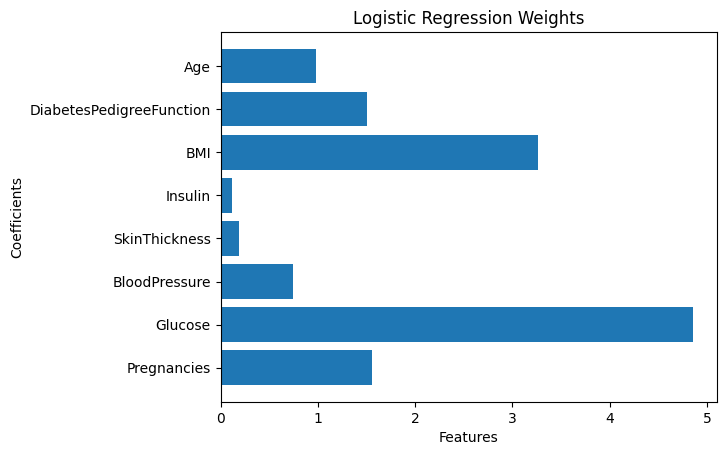

Top 3 most important features:
1. Glucose (|coef| = 4.8560)
2. BMI (|coef| = 3.2616)
3. Pregnancies (|coef| = 1.5549)


In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

model = LogisticRegression(max_iter=1000,random_state=seed)
model.fit(x_scaled, y)

coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

sorted_indices = np.argsort(importance_weights)[::-1]
top_features = [input_df.columns[i] for i in sorted_indices[:3]]

print("Top 3 most important features:")
for rank, feature in enumerate(top_features, start=1):
    print(f"{rank}. {feature} (|coef| = {importance_weights[sorted_indices[rank-1]]:.4f})")

As can be seen in the bar plot and the list the 3 most important features are Glucose, BMI and Pregnancies as the bars that are largest and the higher coef numbers represent higher importance.

# Linear Regression

## Question 1

In [ ]:
df = pd.read_csv('diabetes.csv')
input_df = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
x = input_df.to_numpy()
y = df['Glucose'].to_numpy()
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)

## Question 2

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", round(mse, 2))
print("Mean Absolute Error:", round(mae, 2))

Mean Squared Error: 929.89
Mean Absolute Error: 23.6


The most appropriate metric in this situation is MAE as the error is much lower than MSE. This metric does not put as much importance on the outliers in the dataset, thus better reflecting reality and the average situation without being affected.

## Question 3

In [ ]:
alpha = [0.2, 0.4, 0.6, 0.8, 1.0]
results = []

for a in alpha:
  model = Lasso(alpha=a)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  results.append((a, mae))

results_df = pd.DataFrame(results, columns=['Alpha', 'MAE'])
print(results_df)

   Alpha        MAE
0    0.2  23.594203
1    0.4  23.588415
2    0.6  23.582629
3    0.8  23.576843
4    1.0  23.571058


## Question 4

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

input_df = pd.DataFrame(x_scaled, columns=input_df.columns)
x_train, x_test, y_train, y_test = train_test_split(input_df, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

coeffs = model.coef_
importance_weights = np.abs(coeffs)
min_index = np.argmin(importance_weights)
least_feature = input_df.columns[min_index]

x_new = input_df.drop(columns=[least_feature])
x_tran_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y, test_size=0.3, random_state=0)

model_new = LinearRegression()
model_new.fit(x_tran_new, y_train_new)
y_pred_new = model_new.predict(x_test_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)
mae_new = mean_absolute_error(y_test_new, y_pred_new)
print("Mean Squared Error:", round(mse, 2))
print("Mean Absolute Error:", round(mae, 2))
print(f"Mean Squared Error without {least_feature}: {round(mse_new, 2)}")
print(f"Mean Absolute Error without {least_feature}: {round(mae_new, 2)}")


Mean Squared Error: 929.89
Mean Absolute Error: 23.57
Mean Squared Error without Pregnancies: 930.4
Mean Absolute Error without Pregnancies: 23.59


According to the error calculations we can see that the model without the least important feature performs marginally worse than with it, which can be seen in both metrics as they are higher than before.